In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Write a program to numerically evaluate the derivative of 
f(x)=cos x at an arbitrary position x

In [2]:
def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    return (y(x+dx/2.)-y(x-dx/2.))/dx

def deried(y,x,dx):
    cd1 = dericd(y, x, dx)
    cd2 = dericd(y, x, dx/2.)
    return (4.*cd2-cd1)/3.

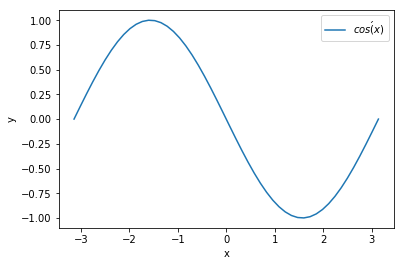

In [44]:
dx = (np.finfo(float).eps)**0.2
x = np.linspace(-np.pi, np.pi)
y = deried(np.cos, x, dx)
plt.plot(x, y,label=r'$cos\'(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

1) Evaluate the derivative at position x using the forward 
difference scheme. Plot log(Error)=log10|f’(numerically)
-
f’(analytic)| against log10(dx) for dx=1e
-
16,1e
-
15,
...
.,0.1 at 
x=
π
/4. You should find Error~dx
n
; what is n? what is the 
optimal value for dx.

In [47]:
dx = 10.**np.arange(-16,0)

In [48]:
numerical = derifw(np.cos, np.pi/4., dx)
logError  = np.log10(abs(numerical - (-1./np.sqrt(2.)) ))

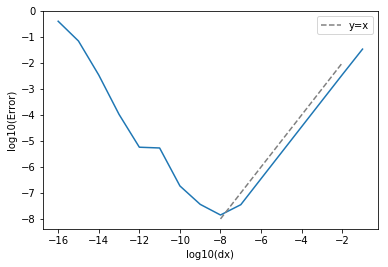

In [49]:
plt.plot(np.log10(dx), logError)
plt.plot(np.linspace(-8,-2), np.linspace(-8,-2), '--', color='grey', label='y=x')
plt.xlabel('log10(dx)')
plt.ylabel('log10(Error)')
plt.legend()
# n is 1
# the optimal dx ~ 1e-8

2) Repeat the exercise fusing the central difference scheme. 
Why this scheme is better?

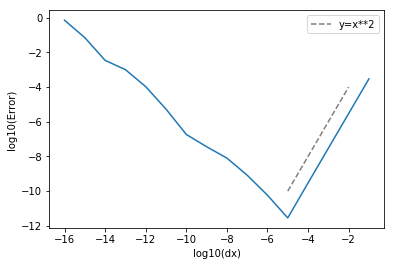

In [53]:
numerical = dericd(np.cos, np.pi/4., dx)
logError  = np.log10(abs(numerical - (-1./np.sqrt(2.)) ))

plt.plot(np.log10(dx), logError)
plt.plot(np.linspace(-5,-2), 2*np.linspace(-5,-2), '--', color='grey', label='y=x**2')
plt.xlabel('log10(dx)')
plt.ylabel('log10(Error)')
plt.legend()
# n is 2
# the optimal dx ~ 3e-5
# This scheme is better since it achieves higher precision using larger dx.
# (because roundoff error increases when h becomes smaller)

3) Repeat (2) for x=0. Why do the results differ?

In [65]:
numerical = dericd(np.cos, 0., dx)
logError  = np.log10(abs(numerical - (0.)) )

# n is 2
# the optimal dx ~ 3e-5
# This scheme is better since it achieves higher precision using larger dx.
# (because roundoff error increases when h becomes smaller)

/homes/shjzhang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [64]:
print (numerical)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


no matter what dx is, the error is always zero. This is because 

\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}

since cos(x) is an even function, y(t+h/2)=y(t-h/2) no matter what h is.

Quadratic Equation

y = ax**2 + bx + c

a)Write a program that calculates all four solutions for arbitrary values
of a, b, and c.

In [38]:
def x11(a,b,c):
    return (-b+np.sqrt(b**2-4.*a*c))/(2.*a)
def x21(a,b,c):
    return (-b-np.sqrt(b**2-4.*a*c))/(2.*a)
def x12(a,b,c):
    return -2.*c/(b+np.sqrt(b**2-4.*a*c))
def x22(a,b,c):
    return -2.*c/(b-np.sqrt(b**2-4.*a*c))
def y(x, a,b,c):
    return a*x**2 + b*x + c

b) Investigate how errors in your computed answers become large as the subtractive cancelation increases and relate this to the known machine precision. (Hint: A good test case utilizes a = 1, b = 1, c = 10−n, n = 1, 2, 3, ....)

In [58]:
a=b=1.
n = np.arange(1,100.)
c = 10.**-n
x1 = x11(a, b, c)
x2 = x21(a, b, c)

Now suppose x1 is the root that's near zero and negative whereas x2 is the root ~ negtive one. 


For this problem, it's hard to get a real error, since by either pluging x1 into the equation and check if it's zero, or use the definition of the error will introduce another subtraction of two small numbers. To sort of get around with it, we know at least x1 should never be exact zero and we know x2 is more accurate than x1. If x1 is equal to zero, there must be some error. Following this thought,

Text(0,0.5,'x1')

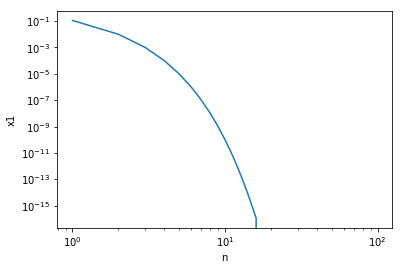

In [72]:
plt.plot(n, abs(x1))
plt.loglog()
plt.xlabel('n')
plt.ylabel("x1")

# Even though I don't know what exactly the relatively error before x1 hits zero, but I know it should increase and 
# when x1=0, the relative error is 100 percent (|0-exact|/exact).

c) Extend your program so that it indicates the most precise solutions.

In [73]:
# Since x1 times x2 equals c/a, I can calculate x1 in another way
x1x2 = c/a
x1new = x1x2 / x2

Text(0.5,0,'n')

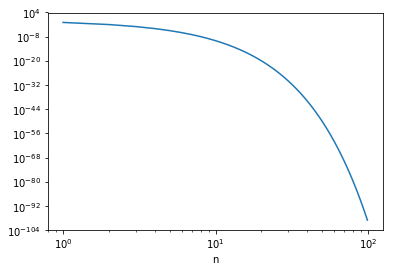

In [74]:
plt.plot(n, abs(x1new))
plt.loglog()
plt.xlabel('n')
# and now xl becomes smaller and smaller, but never hits one, which seems to have a higher relative error.